In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import requests
from bs4 import BeautifulSoup as bs
from tqdm import tqdm_notebook as tqdm
import json
import urllib.request

prod= pd.read_csv('../data/new_product.csv')
cust= pd.read_csv('../data/new_custom.csv')
mast= pd.read_csv('../data/new_master.csv')
sess= pd.read_csv('../data/new_session.csv')
lotte_list = pd.read_csv('../data/lotte_luxury_list.csv')
sear1 = pd.read_csv('../data/new_search1.csv')

In [0]:
prod['PD_BRA_NM'] = prod['PD_BRA_NM'].map(lambda x: x.split('(')[0].replace('[','').replace(']','').replace(' ',''))
prod.loc[prod['PD_BRA_NM']=='MADE IN ITALY','PD_BRA_NM'] = 'V73'
prod.loc[prod['PD_BRA_NM'].isin(['1909535','19330640825']),'PD_BRA_NM'] = 'KL'
prod.loc[prod['PD_BRA_NM']=='19386640906','PD_BRA_NM'] = '지이크'
prod.loc[prod['PD_BRA_NM'].isin(['1907517','1924113','1906469','1906471','1902295','1908178','1881326','1924116','1906492','1902287']),'PD_BRA_NM'] = 'CC collect'
prod.loc[prod['PD_BRA_NM'].isin(['19379580904','19364580830','1872892','1898551','18703070925','19359410830']),'PD_BRA_NM'] = '더아이잗'
prod.loc[prod['PD_BRA_NM'].isin(['1904418','1896342']),'PD_BRA_NM'] = '보니스팍스'
prod.loc[prod['PD_BRA_NM'].isin(['1912506','1912518']),'PD_BRA_NM'] = '리스트'
prod.loc[prod['PD_BRA_NM']=='19326280823','PD_BRA_NM'] = 'ENC'
prod.loc[prod['PD_BRA_NM'].isin(['19266920905','19266920905','19266920905']),'PD_BRA_NM'] = '요하넥스'
prod.loc[prod['PD_BRA_NM']=='1913802','PD_BRA_NM'] = '꼼빠니아'
prod.loc[prod['PD_BRA_NM']=='1917759','PD_BRA_NM'] = '인디안'

prod_mast = pd.merge(prod, mast, how = 'inner', on=['PD_C'])

# df[df['PD_BUY_CT']>=150000].sort_values(by=['PD_BUY_AM'],ascending=False)
cate_list= ['패션잡화','여성의류','화장품/뷰티케어','남성의류']
prod_mast1 = prod_mast[prod_mast['CLAC1_NM'].isin(cate_list)]

prod_mast1_sess = pd.merge(prod_mast1, sess, how = 'inner', on=['CLNT_ID', 'SESS_ID'])
df = prod_mast1_sess[prod_mast1_sess['PD_BRA_NM'].isin(lotte_list['BRA_NM'])]

In [85]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
from tqdm import tqdm_notebook as tqdm
import json
from google.colab import drive 
import urllib.request
from pandas.io.json import json_normalize
drive.mount('/content/gdrive')
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
prod_mast = pd.read_csv('gdrive/My Drive/공모전/Lpoint/선호지수 만들기/trend_score.csv')
sess = pd.read_csv('gdrive/My Drive/공모전/Lpoint/data/Session.csv')
# sess.dropna(inplace = True)
sess['TOT_SESS_HR_V'] = pd.to_numeric(sess['TOT_SESS_HR_V'].str.replace(',',''))
# cust = pd.read_csv('gdrive/My Drive/공모전/Lpoint/data/Custom.csv')
df = pd.merge(prod_mast, sess, how = 'inner', on=['CLNT_ID', 'SESS_ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697754 entries, 0 to 697753
Data columns (total 20 columns):
CLNT_ID            697754 non-null int64
SESS_ID            697754 non-null int64
HITS_SEQ           697754 non-null int64
PD_C               697754 non-null int64
PD_ADD_NM          697754 non-null object
PD_BRA_NM          697754 non-null object
PD_BUY_AM          697754 non-null int64
PD_BUY_CT          697754 non-null int64
PD_NM              697754 non-null object
CLAC1_NM           697754 non-null object
CLAC2_NM           697754 non-null object
CLAC3_NM           697754 non-null object
TREND_SC           697754 non-null float64
SESS_SEQ           697754 non-null int64
SESS_DT            697754 non-null int64
TOT_PAG_VIEW_CT    697696 non-null float64
TOT_SESS_HR_V      695272 non-null float64
DVC_CTG_NM         697754 non-null object
ZON_NM             697754 non-null object
CITY_NM            697754 non-null object
dtypes: float64(3), int64(8), object(9)
memory usage: 

In [0]:
# 최신성
# 9월 1.0, 8월 0.9, 7월 0.8, 6월 0.7, 5월 0.6, 4월 0.5

#월을 추출
df['month'] = df['SESS_DT'].map(lambda x : int(str(x)[4:6]))
#SESS_ID마다 지수를 설정
df['fe1_test'] = (df['month']+1)/10
#지수 추합
fe1 = df[['PD_C', 'fe1_test']].groupby(by='PD_C').sum()

In [0]:
df['cnt'] = 1

In [0]:
# 관심도1 => 시간
# 1600~1700 이 0점 # mean:1648.329964

#SESS_ID마다 지수를 설정
df['fe2_1_test'] = (df.TOT_SESS_HR_V - np.nanmean(df.TOT_SESS_HR_V))/100
#지수추합
fe2_1 = df[['PD_C', 'fe2_1_test', 'cnt']].groupby(by='PD_C').sum()

In [0]:
# 관심도2 => 총페이지조회건수
# 50~100 이 0점 # mean : 92.700773

#SESS_ID마다 지수를 설정
df['fe2_2_test'] = (df['TOT_PAG_VIEW_CT'] - np.nanmean(df['TOT_PAG_VIEW_CT']))/100
#지수추합
fe2_2 = df[['PD_C', 'fe2_2_test']].groupby(by='PD_C').sum()

In [34]:
df.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_NM,CLAC1_NM,...,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,month,fe1_test,cnt,fe2_1_test,fe2_2_test
0,4139680,7605037,12,642112,색상:워터멜론,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,21.0,902.0,desktop,Seoul,Seoul,5,0.6,1,-8.254123,-0.800536
1,4139680,7605037,28,642112,색상:카바나,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,21.0,902.0,desktop,Seoul,Seoul,5,0.6,1,-8.254123,-0.800536
2,4139680,7605037,12,642112,색상:카바나,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,21.0,902.0,desktop,Seoul,Seoul,5,0.6,1,-8.254123,-0.800536
3,4139680,7605037,28,642112,색상:워터멜론,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,21.0,902.0,desktop,Seoul,Seoul,5,0.6,1,-8.254123,-0.800536
4,4139680,7605037,12,401577,색상:몰리 와우,바비브라운,39000,1,[한정판] 크러쉬드 립칼라 2.0 - 몰리 와우,화장품/뷰티케어,...,21.0,902.0,desktop,Seoul,Seoul,5,0.6,1,-8.254123,-0.800536


In [113]:
df1 = df.groupby(['CLAC3_NM','PD_BRA_NM']).agg({'TREND_SC':'mean','fe1_test':'mean','fe2_1_test':'mean','fe2_2_test':'mean'}).reset_index()
df1['fe2_1_test'].fillna(min(df1['fe2_1_test']), inplace=True)
df1.head()

,CLAC3_NM,PD_BRA_NM,TREND_SC,fe1_test,fe2_1_test,fe2_2_test
0,2단우산,루이까또즈,31.624072,0.750000,-8.431623,-0.318036
1,2단우산,엘르,4.156726,0.700000,0.255877,0.859464
2,2단우산,탠디,0.422276,0.616667,-1.433567,-0.248869
3,3단우산,탠디,0.474579,0.711111,-1.735234,-0.222758
4,BB/파운데이션/컴팩트류,SK-II,25.999873,0.752459,-0.259680,-0.023905


In [0]:
def normalize(x):
  return (x-np.mean(x))/(np.std(x))

In [0]:
df1['LABEL'] = df1[['PD_BRA_NM','CLAC3_NM']].apply(lambda x:f'{x[0]}_{x[1]}', axis=1)

In [0]:
df1['TREND_SC'] = normalize(df1['TREND_SC'])
df1['fe1_test'] = normalize(df1['fe1_test'])
df1['fe2_1_test'] = normalize(df1['fe2_1_test'])
df1['fe2_2_test'] = normalize(df1['fe2_2_test'])

In [0]:
df1['관심도'] = (df1['fe2_1_test']+df1['fe2_2_test'])/2
df1['인기도'] = df1['TREND_SC']
df1['최신성'] = df1['fe1_test']
sc = df1['관심도']+df1['인기도']+df1['최신성']
df1['SCORE'] = (sc - min(sc))/(max(sc)-min(sc))
df1['SCORE2'] = normalize(sc)

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 12 columns):
CLAC3_NM      4157 non-null object
PD_BRA_NM     4157 non-null object
TREND_SC      4157 non-null float64
fe1_test      4157 non-null float64
fe2_1_test    4157 non-null float64
fe2_2_test    4157 non-null float64
LABEL         4157 non-null object
관심도           4157 non-null float64
인기도           4157 non-null float64
최신성           4157 non-null float64
SCORE         4157 non-null float64
SCORE2        4157 non-null float64
dtypes: float64(9), object(3)
memory usage: 389.8+ KB


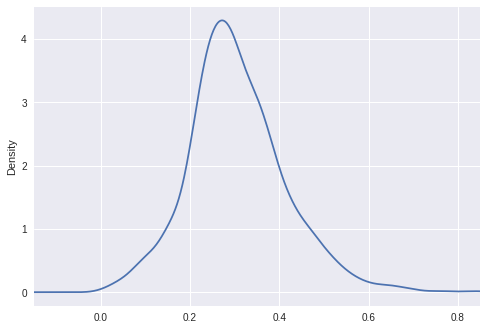

In [106]:
df1['SCORE'].plot.density(xlim=(-0.15,0.85))

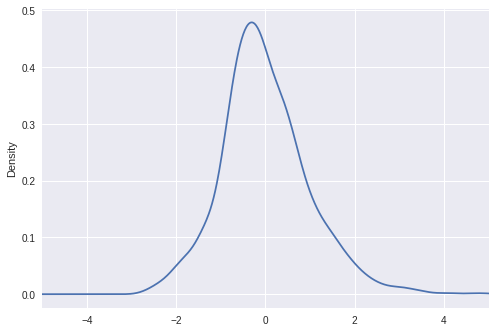

In [111]:
df1['SCORE2'].plot.density(xlim=(-5,5))

In [0]:
df_f = df1[['LABEL','SCORE']]
df_f2 = df1[['LABEL','SCORE2']]
df_f.to_csv('gdrive/My Drive/공모전/Lpoint/선호지수 만들기/score1.csv',index=False)
df_f2.to_csv('gdrive/My Drive/공모전/Lpoint/선호지수 만들기/score2.csv',index=False)

In [125]:
df_f.head()

,LABEL,SCORE
0,루이까또즈_2단우산,0.358852
1,엘르_2단우산,0.286935
2,탠디_2단우산,0.145516
3,탠디_3단우산,0.203792
4,SK-II_BB/파운데이션/컴팩트류,0.368414


In [126]:
df_f2.head()

,LABEL,SCORE2
0,루이까또즈_2단우산,0.473119
1,엘르_2단우산,-0.171320
2,탠디_2단우산,-1.438566
3,탠디_3단우산,-0.916365
4,SK-II_BB/파운데이션/컴팩트류,0.558809
